# SPRINT 4

**Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.**

In [82]:
import pandas as pd
import numpy as np
columnas=['ID', 'Pelicula','Genero']
df=pd.read_csv('C:/Users/flore/Desktop/DS/Sprint 4/PRE-PROCESSING-DATA-main/movies.csv', sep='::', 
                 encoding='latin-1', engine='python', header=None, names=columnas)
df

,ID,Pelicula,Genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


Al observar los datos, podemos ver que los años se encuentran separados entre parentesis, por lo que usamos el split para separar estos, poniendo la posición de cada uno de los dígitos que queremos generar como una nueva columna. 
Por otro lado, separamos las columnas de género y nos quedamos solo con la que se encuentra en la posición 0 de las nuevas columnas generadas.

In [83]:
df['Year'] = df.Pelicula.str.slice(start=-5, stop=-1)
df['Movie'] = df.Pelicula.str.slice(start=0, stop=-6)
df['Genre']=df.Genero.str.split('|', expand=True).iloc[:,0]

df

,ID,Pelicula,Genero,Year,Movie,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,Animation
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Jumanji,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Waiting to Exhale,Comedy
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II,Comedy
...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,Meet the Parents,Comedy
3879,3949,Requiem for a Dream (2000),Drama,2000,Requiem for a Dream,Drama
3880,3950,Tigerland (2000),Drama,2000,Tigerland,Drama
3881,3951,Two Family House (2000),Drama,2000,Two Family House,Drama


Ya teniendo las nuevas columas procedemos a eliminar las antiguas columnas por estar repetidas: 'Genero' y 'Pelicula'. Podemos borrarlas ya que estamos seguras que las tenemos repetidas y no tendría sentido guardarlas.

In [84]:
df.drop(['Pelicula', 'Genero'], axis = 'columns', inplace=True)

In [85]:
df

,ID,Year,Movie,Genre
0,1,1995,Toy Story,Animation
1,2,1995,Jumanji,Adventure
2,3,1995,Grumpier Old Men,Comedy
3,4,1995,Waiting to Exhale,Comedy
4,5,1995,Father of the Bride Part II,Comedy
...,...,...,...,...
3878,3948,2000,Meet the Parents,Comedy
3879,3949,2000,Requiem for a Dream,Drama
3880,3950,2000,Tigerland,Drama
3881,3951,2000,Two Family House,Drama


Ordenamos las columnas, poniendo primero el ID, luego la película, año y género.

In [86]:
df=df[['ID', 'Movie', 'Year', 'Genre']]
df

,ID,Movie,Year,Genre
0,1,Toy Story,1995,Animation
1,2,Jumanji,1995,Adventure
2,3,Grumpier Old Men,1995,Comedy
3,4,Waiting to Exhale,1995,Comedy
4,5,Father of the Bride Part II,1995,Comedy
...,...,...,...,...
3878,3948,Meet the Parents,2000,Comedy
3879,3949,Requiem for a Dream,2000,Drama
3880,3950,Tigerland,2000,Drama
3881,3951,Two Family House,2000,Drama


<AxesSubplot:xlabel='Genre'>

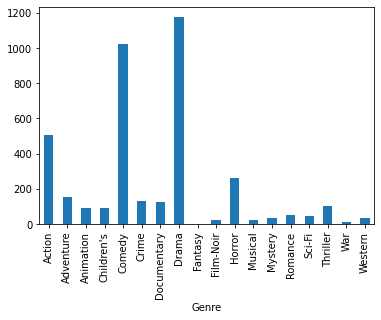

In [87]:
import matplotlib.pyplot as plt
genero_count=df.groupby(['Genre'])['Genre'].count().plot(kind='bar')
genero_count

<AxesSubplot:ylabel='Genre'>

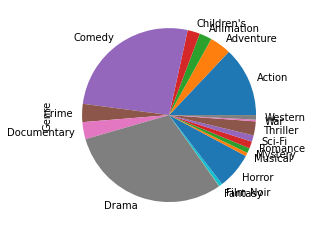

In [88]:

df.groupby(['Genre'])['Genre'].count().plot(kind='pie')

In [89]:
df['Year'] = df['Year'].astype('float64')
df.dtypes

ID         int64
Movie     object
Year     float64
Genre     object
dtype: object

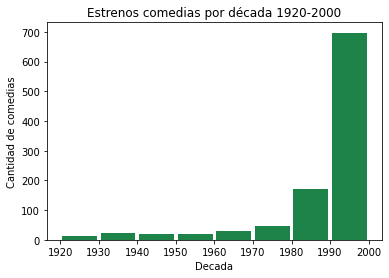

In [90]:
#plt.figure(1)
peli_comedia = df.loc[df.Genre == 'Comedy']

intervalos=np.arange(1920,2010,10)

plt.hist(x=peli_comedia.Year, color='#1D8348', rwidth=0.90, bins=intervalos)
plt.title('Estrenos comedias por década 1920-2000')
plt.xlabel('Decada')
plt.ylabel('Cantidad de comedias')

plt.show()


Podremos también analizar géneros que fueron particularmente famosos que han marcado épocas transgresoras del cine, pero que sin embargo hoy en día ya no tienen ese éxitos popular, como es el caso del Western:

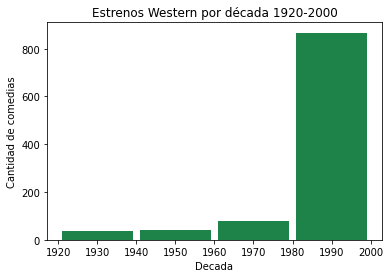

In [91]:
peli_western = df.loc[df.Genre == 'Western']

intervalos=np.arange(1920,2010,20)

plt.hist(x=peli_comedia.Year, color='#1D8348', rwidth=0.90, bins=intervalos)
plt.title('Estrenos Western por década 1920-2000')
plt.xlabel('Decada')
plt.ylabel('Cantidad de comedias')

plt.show()

Podemos ver como la mayor cantidad de peliculas se dan entre 1980 y el 20. Auque debemos tener en cuenta 2 cosas importantes: En primera instancia hemos optado solo por una pila de los géneros que caracterizaban a las peliculas, por lo que puede ser que nos estemos saltando datos importantes para sacar buenas conclusiones, y en segundo lugar hay 20 años en este lapso de tiempo. 
Asique si hacemos un segundo filtro especificado únicamente estos 20 años y poniendo un intervalo menor de solo 5 años:

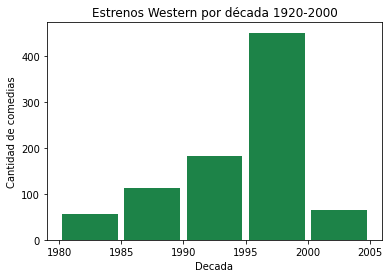

In [92]:
peli_western = df.loc[df.Genre == 'Western']

intervalos=np.arange(1980,2010,5)

plt.hist(x=peli_comedia.Year, color='#1D8348', rwidth=0.90, bins=intervalos)
plt.title('Estrenos Western por década 1920-2000')
plt.xlabel('Decada')
plt.ylabel('Cantidad de comedias')

plt.show()

Podremos ver como la mayor cantidad de peliculas se dan principalmente de 1995 al 2000

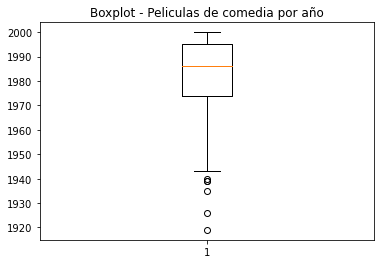

In [94]:
peli_adventure = df.loc[df.Genre == 'Adventure']
peli_adventure
plt.boxplot(peli_adventure.Year)
plt.title("Boxplot - Peliculas de comedia por año")
plt.show()

Como podemos ver, por medio de un diagrama de tipo box-plot, la mediana está entre 1980-1990, con una distribución asimétrica de tipo negativa. Luego hay outliers entre 1920-1940